In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils.class_weight import compute_class_weight

In [2]:
df = pd.read_csv('../data/wine_quality_modelos2.csv')
df

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,baja,media,alta,quality_category
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0,0,baja
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,0,0,baja
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1,0,0,baja
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,1,0,media
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0,0,baja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,1,0,media
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1,0,0,baja
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,1,0,media
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0,1,0,media


In [21]:
registros_con_quality_9 = df[df['quality'] == 9]
registros_con_quality_9

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,baja,media,alta,quality_category,quality_category_int,wine_type_int
2373,white,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,0,0,1,alta,2,1
2419,white,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,0,0,1,alta,2,1
2426,white,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,0,0,1,alta,2,1
2475,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,0,0,1,alta,2,1
3204,white,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,0,0,1,alta,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wine_type             6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  baja                  6497 non-null   int64  
 14  media                 6497 non-null   int64  
 15  alta                 

In [4]:
mapeo_quality_category = {
    'baja': 0,
    'media': 1,
    'alta': 2
}
df['quality_category_int'] = df['quality_category'].map(mapeo_quality_category)

In [5]:
map_wine_type = {
    "red": 0,
    "white": 1
}

df["wine_type_int"] = df["wine_type"].map(map_wine_type)

In [10]:
df.to_csv('../data/wine_quality_modelos3.csv', index= False)

In [7]:
st_scaler = StandardScaler()

# Separamos las features de las etiquetas 
X = df[['volatile acidity','chlorides','density','alcohol']]
y = df["quality_category_int"]
ytype = df['wine_type_int']

# Escalamos los datos
X_scaled = st_scaler.fit_transform(X)

In [8]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size = 0.2, random_state = 10, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=10, stratify=y_temp)

In [12]:
capas = [
    keras.layers.Flatten(input_dim=4),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 3, activation='softmax')
]

model_neuronal = keras.models.Sequential(capas)

model_neuronal.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model_neuronal.summary()

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

history = model_neuronal.fit(
    X_train,
    y_train,
    class_weight=class_weights_dict,
    batch_size = 32,
    epochs = 100,
    validation_data = (X_valid, y_valid) # validation_split = 0.1
)

results = model_neuronal.evaluate(X_test, y_test)
results

c:\Users\amaci\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │         1,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,403 (9.39 KB)

 Trainable params: 2,403 (9.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5013 - loss: 1.0013 - val_accuracy: 0.3862 - val_loss: 1.0226
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3800 - loss: 0.9437 - val_accuracy: 0.4492 - val_loss: 0.9701
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4389 - loss: 0.8658 - val_accuracy: 0.4615 - val_loss: 0.9708
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4616 - loss: 0.8366 - val_accuracy: 0.4692 - val_loss: 0.9761
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4688 - loss: 0.8215 - val_accuracy: 0.4815 - val_loss: 0.9669
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4642 - loss: 0.8351 - val_accuracy: 0.5031 - val_loss: 0.9340
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4844 - loss: 0.8243 - val_accuracy: 0.5154 - val_loss: 0.9179
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5180 - loss: 0.8185 - val_accu

[0.8844428658485413, 0.563076913356781]

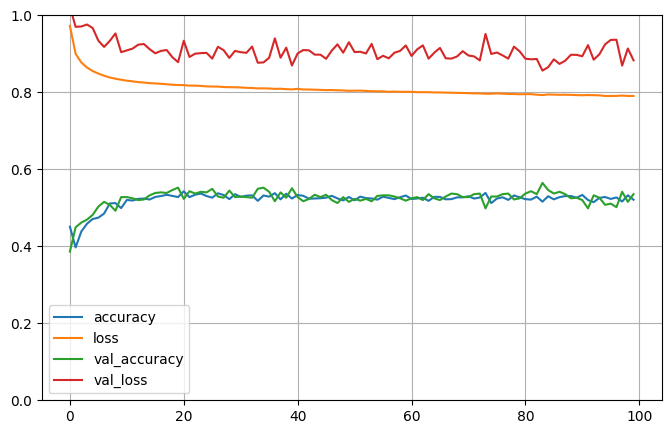

In [13]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [14]:
predictions = model_neuronal.predict(X_test)
predictions

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.28336892, 0.4552236 , 0.2614075 ],
       [0.17379892, 0.49715185, 0.3290493 ],
       [0.7676837 , 0.2178775 , 0.01443877],
       ...,
       [0.36439398, 0.43677878, 0.19882728],
       [0.4991538 , 0.40313378, 0.0977124 ],
       [0.04633889, 0.30191714, 0.65174395]], dtype=float32)

In [16]:
model_neuronal.predict(X_test).argmax(axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([1, 1, 0, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 1, 1, 1, 0, 0, 2,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1, 0, 2, 1, 2, 1, 1, 1, 1, 0, 0,
       2, 0, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 0, 2, 0, 2, 1,
       0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1,
       2, 1, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0,
       1, 1, 2, 2, 0, 2, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0,
       0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 0, 0, 2, 0,
       0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       2, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1,
       0, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1,
       0, 1, 2, 2, 0, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 2, 0, 1,

In [17]:
cm = confusion_matrix(y_test, model_neuronal.predict(X_test).argmax(axis=1))

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


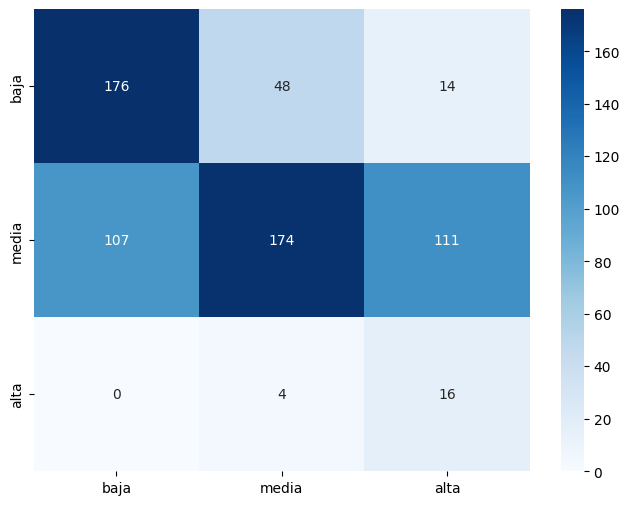

In [18]:
# Matriz de confusion
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    cm, 
    annot=True, 
    fmt='d',          # 'd' = formato entero (sin decimales)
    cmap='Blues',     # Colores azules (puedes usar 'Reds', 'Greens', etc.)
    cbar=True,        # Muestra la barra de colores lateral
    xticklabels=['baja', 'media', 'alta'],  # Nombres de clases (¡ajústalos!)
    yticklabels=['baja', 'media', 'alta'] # Nombres de clases
)

In [19]:
print(classification_report(y_test, model_neuronal.predict(X_test).argmax(axis=1)))

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

           0       0.62      0.74      0.68       238
           1       0.77      0.44      0.56       392
           2       0.11      0.80      0.20        20

    accuracy                           0.56       650
   macro avg       0.50      0.66      0.48       650
weighted avg       0.70      0.56      0.59       650

